In [2]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


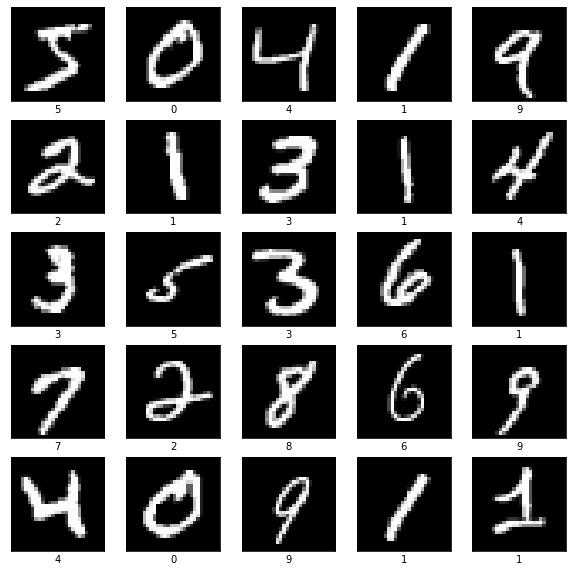

In [4]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [5]:
# sequential model construction

model = Sequential()

# 1st conv => 5 x 5 x 32 필터
model.add(Conv2D(input_shape=(28,28,1), kernel_size=5, filters=32, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

# 1st pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))

# 2nd conv => 5 x 5 x 64 필터
model.add(Conv2D(kernel_size=5, filters=64, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

# 2nd pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 83,466
Trainable params: 83,466
Non-trainable params: 0
____________________________________________________

In [10]:
start_time = datetime.now()

hist = model.fit(x_train.reshape(-1,28,28,1), t_train, batch_size=50, epochs=50, validation_split=0.2)

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
960/960 [==============================] - 35s 4ms/step - loss: 0.1580 - accuracy: 0.9515 - val_loss: 0.0611 - val_accuracy: 0.9817
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.0431 - val_accuracy: 0.9880
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9883
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0377 - val_accuracy: 0.9896
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 7/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0377 - val_accuracy: 0.9897
Epoch

In [11]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9911


[0.06705336272716522, 0.991100013256073]

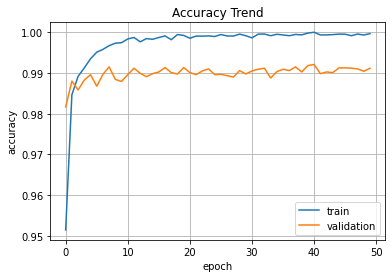

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

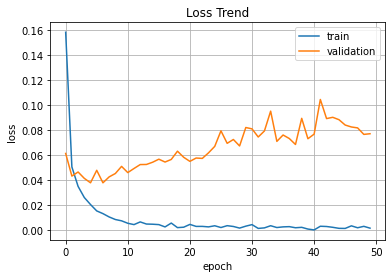

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()